# Reading Activity 11 - Analytical examples of Bayesian inference

## Objectives

+ To introduce Bayesian parameter estimation.

## References

+ [Principle of maximum entropy](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy) wikipedia entrty.

## Bayesian Parameter Estimation

Assume that we have a model that predicts the result of a random variable $X$.
The model has some parameters $\theta$ which are to be determined from data which consist of $N$ independent measurements of $X$, i.e., the data are:
$$
x_{1:N} = (x_1,\dots,x_N).
$$
We can write the model as:
$$
x_n|\theta \sim p(x_n|\theta),
$$
where we started abusing the mathematical that requires us to use capital letters of random variables and lower case letters for data.
But this is just simpler and this is the notation we will be following from now on.
The term $p(x_n|\theta)$ is known as the *likelihood* of this data point.
The likelihood of the entire dataset $x_{1:N}$ is just the joint probability density of all observations, i.e., $p(x_{1:N}|\theta)$.
Because all observations are indpendent conditioned on the model parameters $\theta$, we have:
$$
p(x_{1:N}|\theta) = \prod_{n=1}^Np(x_n|\theta).
$$
Be careful. This factorization of the likelihood is not valid if the measurements are not independent.
In that case, you need to keep the entire thing together (or factorize it in the way that it factorizes...)

To close the loop, we need to say what we think about the pameters before we see any data.
In Bayesian jargon, we need to specify our *prior state of knowledge*, or simple our *prior*:
$$
\theta \sim p(\theta).
$$
How we do this is a big discussion.
For now let's just say that we use common sense.

The situation can be discribed graphical as:

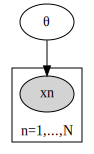

In [1]:
from graphviz import Digraph
gcp = Digraph('coin_toss_bayes_plate')
gcp.node('theta', label='<&theta;>')
with gcp.subgraph(name='cluster_0') as sg:
    sg.node('xn', label='<x<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gcp.edge('theta', 'xn')
gcp.render('coin_toss_bayes_plate', format='png')
gcp

We are now ready to apply Bayes' rule to find the posterior.
Recall the Bayes' rule for propositions $A$ and $B$:
$$
p(A|B) = \frac{p(AB)}{p(B)}.
$$
We set here
$$
A = \text{the model parameters} = \theta,
$$
and
$$
B = \text{the data} = x_{1:N}.
$$
That is the question we ask is "what is the probability of the model parameters given the data?"
Let's just blindly follow the rule:
$$
p(\text{the model parameters}|\text{the data}) = \frac{p(\text{the data and the parameters})}{p(\text{the data})}.
$$
This $p(\text{the model parameters}|\text{the data})$ has a special name.
It is our *posterior state of knowledge* about the model parameters or simply the *posterior*.

We are ready to proceed.
What is the joint probability of the data and the parameters?
Well, we can use the Bayes rule again, but in this form:
$$
p(AB) = p(B|A)p(A).
$$
In our example:
$$
p(\text{the data and the parameters}) = p(\text{the data} | \text{the parameters}) p(\text{the parameters}).
$$
Putting it all together we get:
$$
\text{posterior} = p(\text{the model parameters}|\text{the data}) = 
\frac{p(\text{the data} | \text{the parameters}) p(\text{the parameters})}{p(\text{the data})}
$$
But we have given special names to the terms on the right:
$$
p(\text{the data} | \text{the parameters}) = p(x_{1:N}|\theta) = \text{likelihood},
$$
and
$$
p(\text{the parameters}) = p(\theta) = \text{prior}.
$$
So, we can now write the mnemonic (ignoring the normalization constant):
$$
\text{posterior} \propto \text{likelihood}\times\text{prior}.
$$
Tracking back our symbols, this can be written mathematically as:
$$
p(\theta | x_{1:N}) \propto p(x_{1:N}|\theta)p(\theta).
$$
*The posterior is everything a Bayesian has to say about the parameter estimation problem.*